Họ và tên: Võ Đức Trọng

MSSV: 19110494

In [ ]:
!sudo apt update && sudo apt install xvfb

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:13 http://ppa.launchpad.net

In [ ]:

#Cài đặt thư viện 
!pip install gym-notebook-wrapper pygame -q

     |████████████████████████████████| 21.8 MB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 68.9 MB/s 


In [ ]:
import numpy as np
import gym
import time
from IPython.display import clear_output
import gnwrapper
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()
     

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


27

/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


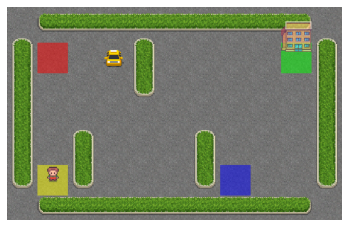

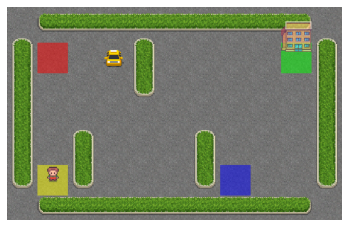

In [ ]:

env.env.s = env.encode(1, 1, 2 ,0)
env.render()

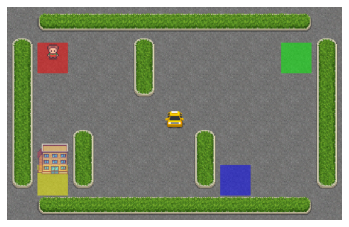

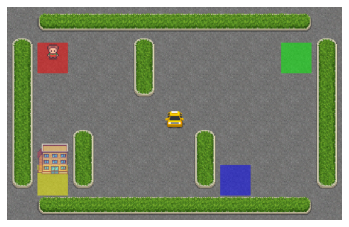

In [ ]:
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()

env.env.s = env.encode(1 ,1 ,4 ,0)
env.render()
     

#Naive-Learning

In [ ]:
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


143

In [ ]:

state_size = env.observation_space.n # số states
action_size = env.action_space.n # số actions
q_table=np.zeros((state_size,action_size))

FILE_SAVE_Naive = "q_table_naive.npy" # định nghĩa file để lưu q_table
total_episodes= 100 # tổng số episodes
total_test_episodes = 2     # tổng số episodes để test
max_steps = 99                # số steps để dừng cho 1 episode

In [ ]:

import time
for episode in range(total_episodes):
    state = env.reset()   # reset lại môi trường
    done = False          # đã hoàn thành trả khách hay chưa
    clear_output(wait=True)
    print("episode: ",episode)
    for step in range(max_steps):
        if  np.max(q_table[state]) ==0:         # nếu trong state q_value đều bằng 0 thì chọn đại 1 action
            action=np.random.randint(0,action_size)
        else:
            action = np.argmax(q_table[state])  # chọn action có q_value lớn nhất

        new_state, reward, done, _ = env.step(action)   # thực hiện hành động để nhận reward và state, action mới

        q_table[state,action] += reward # cập nhật q_table
        state = new_state
        if done:       # nếu taxi có hành vi trả khách thì kết thúc episode
            break

episode:  99


In [ ]:
# lưu lại q_table
np.save(FILE_SAVE_Naive ,q_table)
     

In [ ]:
max_steps = 40
total_test_episodes = 2

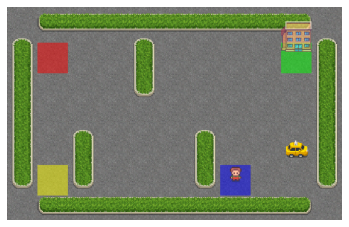

-30
Score over time: 0.0


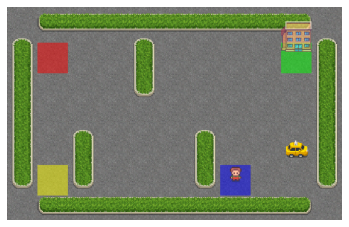

In [ ]:

# từ q_table bắt đầu chơi thử
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()
q_table=np.load("q_table_naive.npy")
rewards = []
for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    for step in range(max_steps):
        time.sleep(0.5)
        clear_output(wait=True)
        print("****************************************************")
        print("EPISODE ", episode)
        action = np.argmax(q_table[state,:])
        new_state, reward, done, info = env.step(action)
        env.render() # hiển thị trò chơi
        total_rewards += reward
        print(total_rewards)
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

# Q-Learning

In [ ]:
state_size = env.observation_space.n
action_size = env.action_space.n

q_table = np.zeros((state_size, action_size))

FILE_SAVE_Qlearning = "q_table_qlearning.npy"
total_episodes = 5000         # Total episodes
total_test_episodes = 2    # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
discount_rate = 0.95         # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

In [ ]:
import time
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()

for episode in range(total_episodes):
    state = env.reset()
    done = False
    clear_output(wait=True)
    print("episode: ",episode)
    for step in range(max_steps):
        
        epsilon = min(min_epsilon, epsilon*decay_rate)
        # kiểm tra xem agent dùng exploitation hay exploration
        if np.random.rand() < epsilon:
            # exploration
            action = np.random.randint(0, action_size)
        else:
            # exploitation
            if np.max(q_table[state])==0:
                action=np.random.randint(0,action_size)
            else:
                action = np.argmax(q_table[state])
            
        # nhận reward và state tiếp theo
        new_state, reward, done, _ = env.step(action)

        # cập nhật q_table theo Bellman equation
        update = reward + discount_rate*q_table[new_state].max() - q_table[state,action]
        q_table[state,action] = q_table[state,action] + learning_rate*update
        state = new_state
        if done:
            break

episode:  4999


In [ ]:
# lưu lại q_table
np.save(FILE_SAVE_Qlearning, q_table)

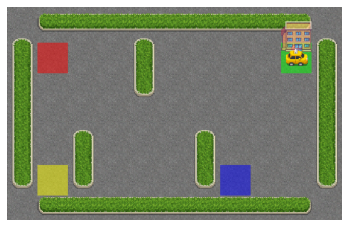

5
Score over time: 6.0


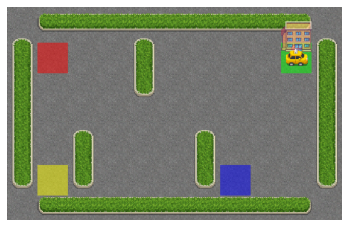

In [ ]:

# từ q_table bắt đầu chơi thử
#q_table=np.load("q_table_qlearning.npy")
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()
q_table=np.load("q_table_qlearning.npy")
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    for step in range(max_steps):
        time.sleep(0.5)
        clear_output(wait=True)
        print("****************************************************")
        print("EPISODE ", episode)
        action = np.argmax(q_table[state,:])
        new_state, reward, done, info = env.step(action)
        env.render() # hiển thị trò chơi
        total_rewards += reward
        print(total_rewards)
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
        
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

# Câu 1: Giải thích vì sao khi dùng Naive-Learning thì xe taxi chỉ đứng yên một chỗ?

Vì ở thuật toán Naive-Learning, agent chỉ tập trung khai thác chứ không phải khám khá. Có thể thấy thi Agent chưa khám phá tốt môi tường.

Agent khi có tìm được một hành động tốt mang lại phần thưởng cho trạng thái hiện. Thì Agent liên tục thực hiện hành động cho những lần sau.

Hành động hiện tại ở trạng thái đó có thể cho Agent một phần thưởng tốt nhưng về tương lại thì có thể không đêm lại phần thuongwe túy lũy tốt.

Agent không học một cách toàn diện không gian trạng thái của trò chơi. Có thể thấy khi chiếc xe gặp một vật cả. Chiếc xe đó không biết thực hiện hành động gì (Có thể agent hiểu nhầm là đã đến mục tiêu cần đón) và đứng im tại đó.


# Câu 2. Giải thích vì sao khi dùng Q-Leaning thì xe taxi có thể đón và trả khách được?

Ta thấy Q-Leaning sử dụng chiến lược epsilon-greedy để chọn hành động, cân bằng tốt giữa việc khám phá và khai thác thông tin từ môi trường.

Các giá trị hành động được được cập nhật lại, không giống như ở Naive-learning chỉ cộng dồn các giá hành động có thể dẫn đến việc làm cho những hành động tốt ở trạng thái đó không được thực hiên. 


# Câu 3. Tìm hiểu một game khác trên OpenAI và thiết lập cho agent chơi được

Ta tìm hiểu về game Frozen Lake 

Không gian hành động là 4:
- 0: Trái
- 1: Xuống
- 2: Phải
- 3: Lên

Không gian trạng thái là 4x4 = 16 (state)

/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


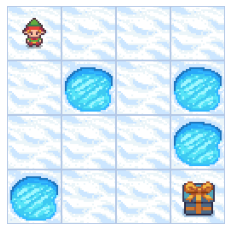

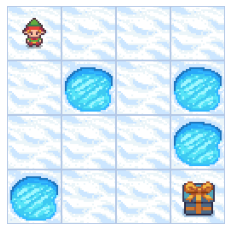

In [ ]:
env = gnwrapper.Animation(gym.make("FrozenLake-v1"))
env.reset()
# new_state, reward, done, info =env.step(1)
env.render()

In [ ]:
state_size = env.observation_space.n
action_size = env.action_space.n

q_table = np.zeros((state_size, action_size))

FILE_SAVE_FrozenLake = "q_table_FrozenLake.npy"
total_episodes = 5000         # Total episodes
total_test_episodes = 10    # Total test episodes
max_steps = 15                # Max steps per episode

learning_rate = 0.5           # Learning rate
discount_rate = 0.75         # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

In [ ]:
# We create our environment with gym.make("<name_of_the_environment>")- `is_slippery=False`: The agent always moves in the intended direction due to the non-slippery nature of the frozen lake (deterministic).
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space", env.observation_space)
print("Sample observation", env.observation_space.sample())

_____OBSERVATION SPACE_____ 

Observation Space Discrete(16)
Sample observation 6


In [ ]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) 


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 2


In [ ]:
import time
env = gnwrapper.Animation(gym.make("FrozenLake-v1"))
env.reset()

for episode in range(total_episodes):
    state = env.reset()
    done = False
    clear_output(wait=True)
    print("episode: ",episode)
    for step in range(max_steps):
        
        epsilon = min(min_epsilon, epsilon*decay_rate)
        # kiểm tra xem agent dùng exploitation hay exploration
        if np.random.rand() < epsilon:
            # exploration
            action = np.random.randint(0, action_size)
        else:
            # exploitation
            if np.max(q_table[state])==0:
                action=np.random.randint(0,action_size)
            else:
                action = np.argmax(q_table[state])
            
        # nhận reward và state tiếp theo
        new_state, reward, done, _ = env.step(action)

        # cập nhật q_table theo Bellman equation
        update = reward + discount_rate*q_table[new_state].max() - q_table[state,action]
        q_table[state,action] = q_table[state,action] + learning_rate*update
        state = new_state
        if done:
            break

episode:  4911


In [ ]:
# lưu lại q_table
np.save(FILE_SAVE_FrozenLake, q_table)

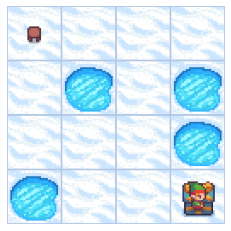

1.0
Score over time: 0.1


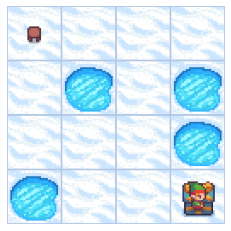

In [ ]:

env = gnwrapper.Animation(gym.make("FrozenLake-v1"))
env.reset()
q_table=np.load(FILE_SAVE_FrozenLake)
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    for step in range(max_steps):
        time.sleep(0.5)
        clear_output(wait=True)
        print("****************************************************")
        print("EPISODE ", episode)
        action = np.argmax(q_table[state,:])
        new_state, reward, done, info = env.step(action)
        env.render() # hiển thị trò chơi
        total_rewards += reward
        print(total_rewards)
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
    if done and total_rewards != 0:
      break
        
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))